# Import Data and library

In [ ]:
!pip install pyodbc pandas

In [70]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [72]:

mdb_file_path = r'C:\Users\SHAYAN\Desktop\LFS_RawData1401_14020712.mdb'

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=' + mdb_file_path + ';'
)

conn = pyodbc.connect(conn_str)

In [74]:

mdb_file_path = r'C:\Users\SHAYAN\Desktop\LFS_RawData1401_14020712.mdb'

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=' + mdb_file_path + ';'
)

conn = pyodbc.connect(conn_str)

cursor = conn.cursor()

tables = cursor.tables(tableType='TABLE')
for table in tables:
    print(table.table_name)

query = 'SELECT * FROM [LFS_RawData]' 
cursor.execute(query)

rows = cursor.fetchall()

df = pd.DataFrame.from_records(rows, columns=[column[0] for column in cursor.description])


conn.close()

LFS_RawData


In [8]:
df.head()

,pkey,NobatAmargiri,F2Kol_DJAYGOZIN,F2_D01,F2_D03,F2_D04,F2_D05,F2_D06,F2_D07,F2_D08,...,F3_D44,F3_D45,F3_D46,F3_D47,F3_D48SAAT,F3_D48ROZ,F3_D49,F3_D50,IW_Yearly,ActivityStatus
0,0110105161,3,2,02,2,2,--,49,52,1,...,,,,2,,,,,274.358094,3
1,0110105161,3,2,03,3,2,--,77,24,1,...,,,,1,,,,,274.358094,3
2,0110105162,2,2,01,1,1,03,50,50,1,...,,,,,,,,,288.560129,1
3,0110105162,2,2,02,2,2,06,56,44,1,...,,,,2,,,,,288.560129,3
4,0110105162,2,2,03,3,1,02,77,24,1,...,,,,1,,,,,288.560129,3


 # Question_1

In [76]:
df['F2_D04'] = pd.to_numeric(df['F2_D04'], errors='coerce')
df['Gender'] = df['F2_D04'].map({1: 'Men', 2: 'Women'})

In [77]:
df['Gender']

0         Women
1         Women
2           Men
3         Women
4           Men
          ...  
674454    Women
674455    Women
674456    Women
674457      Men
674458    Women
Name: Gender, Length: 674459, dtype: object

In [80]:
df.drop('F2_D04', axis=1, inplace=True)
print(df.head())


         pkey NobatAmargiri F2Kol_DJAYGOZIN F2_D01 F2_D03 F2_D05 F2_D06  \
0  0110105161             3               2     02      2     --     49   
1  0110105161             3               2     03      3     --     77   
2  0110105162             2               2     01      1     03     50   
3  0110105162             2               2     02      2     06     56   
4  0110105162             2               2     03      3     02     77   

  F2_D07 F2_D08 F2_D09  ... F3_D45 F3_D46 F3_D47 F3_D48SAAT F3_D48ROZ F3_D49  \
0     52      1      1  ...                    2                               
1     24      1      1  ...                    1                               
2     50      1      1  ...                                                    
3     44      1      1  ...                    2                               
4     24      1      1  ...                    1                               

  F3_D50   IW_Yearly ActivityStatus Gender  
0         274.358094   

In [81]:

df['F2_D17'] = pd.to_numeric(df['F2_D17'], errors='coerce')

education_map = {
    1: 'Below high school',
    2: 'Below high school',
    3: 'Below high school',
    4: 'High school',
    6: "Bachelor’s degree",
    7: "Master’s degree ",
    8: "Above master degree",
    9: 'Unknown'  
}

df['Education_Level'] = df['F2_D17'].map(education_map)

df['Education_Level'] = df['Education_Level'].fillna('Unknown')

print("\nUnique values in Education_Level after cleaning:")
print(df['Education_Level'].unique())

print("\nUpdated DataFrame:")
df


Unique values in Education_Level after cleaning:
['Below high school' 'Bachelor’s degree' 'High school' 'Unknown'
 'Master’s degree ' 'Above master degree']

Updated DataFrame:


,pkey,NobatAmargiri,F2Kol_DJAYGOZIN,F2_D01,F2_D03,F2_D05,F2_D06,F2_D07,F2_D08,F2_D09,...,F3_D46,F3_D47,F3_D48SAAT,F3_D48ROZ,F3_D49,F3_D50,IW_Yearly,ActivityStatus,Gender,Education_Level
0,0110105161,3,2,02,2,--,49,52,1,1,...,,2,,,,,274.358094,3,Women,Below high school
1,0110105161,3,2,03,3,--,77,24,1,1,...,,1,,,,,274.358094,3,Women,Bachelor’s degree
2,0110105162,2,2,01,1,03,50,50,1,1,...,,,,,,,288.560129,1,Men,High school
3,0110105162,2,2,02,2,06,56,44,1,1,...,,2,,,,,288.560129,3,Women,Bachelor’s degree
4,0110105162,2,2,03,3,02,77,24,1,1,...,,1,,,,,288.560129,3,Men,Bachelor’s degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674454,0130217973,1,2,02,2,11,26,75,1,1,...,,2,,,,,47.676078,3,Women,Unknown
674455,0130217973,1,2,03,B,04,60,41,1,1,...,,2,,,,,47.676078,3,Women,Below high school
674456,0130217973,1,2,04,B,07,89,12,1,1,...,,1,,,,,47.676078,3,Women,Below high school
674457,0130217974,1,2,01,1,12,69,31,1,1,...,,,,,,,58.436893,1,Men,High school


In [82]:
consolidated_df = df.groupby('Education_Level', as_index=False).size()
consolidated_df

,Education_Level,size
0,Above master degree,1150
1,Bachelor’s degree,62137
2,Below high school,341260
3,High school,100521
4,Master’s degree,14481
5,Unknown,154910


In [84]:
print(df['ActivityStatus'].dtype)  
print(df['ActivityStatus'].unique())  
print(df['ActivityStatus'].head(10))  


object
['3' '1' '2' None]
0    3
1    3
2    1
3    3
4    3
5    1
6    3
7    3
8    2
9    3
Name: ActivityStatus, dtype: object


In [88]:
df['ActivityStatus'] = df['ActivityStatus'].astype(str).str.strip()  
df['ActivityStatus'] = df['ActivityStatus'].replace({'None': None})  
df['ActivityStatus'] = pd.to_numeric(df['ActivityStatus'], errors='coerce')  


In [90]:
print(df['ActivityStatus'].dtype)  
print(df['ActivityStatus'].unique()) 
print(df['ActivityStatus'].isna().sum())  


float64
[ 3.  1.  2. nan]
103807


In [92]:
results = []

for (gender, education), group in df.groupby(['Gender', 'Education_Level']):
    total_population = len(group)
    employed = (group['ActivityStatus'] == 1).sum()
    unemployed = (group['ActivityStatus'] == 2).sum()
    labor_force = employed + unemployed

    lfpr = (labor_force / total_population) * 100 if total_population > 0 else 0
    ur = (unemployed / labor_force) * 100 if labor_force > 0 else 0

    results.append({
        'Gender': gender,
        'Education_Level': education,
        'Labor Force Participation Rate (%)': round(lfpr, 2),
        'Unemployment Rate (%)': round(ur, 2)
    })

df_results = pd.DataFrame(results)
df_results




,Gender,Education_Level,Labor Force Participation Rate (%),Unemployment Rate (%)
0,Men,Above master degree,71.68,3.32
1,Men,Bachelor’s degree,68.21,11.14
2,Men,Below high school,46.61,6.39
3,Men,High school,76.82,9.00
4,Men,Master’s degree,78.63,6.76
5,Men,Unknown,28.73,5.92
6,Women,Above master degree,59.38,6.22
7,Women,Bachelor’s degree,34.10,26.88
8,Women,Below high school,6.12,5.06
9,Women,High school,10.86,15.89


# Question 2

In [236]:
df['F2_D07'] = df['F2_D07'].astype(str).str.strip()  
df['F2_D07'] = pd.to_numeric(df['F2_D07'], errors='coerce')  
print(df['F2_D07'].dtype)  
print(df['F2_D07'].unique())  


float64
[52. 24. 50. 44. 51. 45. 35. 14. 39. 33. 11. 40. 12. 55. 25. 20. 56. 37.
 86. 61. 70. 57. 42. 36. 16. 13. 17. 79. 80. 43.  9. 78. 77. 75. 76. 59.
 21. 10. 64. 67. 47. 53. 63. 34. 73. 38.  7.  8. 22. 81.  0.  1. 49. 15.
 65. 54. 18. 32.  5.  6. 41. 62. 69. 58. 30. 48. 71. 68. 28. 26. 29. 60.
  3. 23. 46. 31.  4. 27. 66. 19. 85. 83. 72. 87.  2. 84. 97. 98. 88. 82.
 89. 74. 90. 91. 92. 95. 96. 94. 93. nan 99.]


In [244]:
employment_ratio = employment_ratio[(common_ages >= 15) & (common_ages <= 65)]
unemployment_rate = unemployment_rate[(common_ages >= 15) & (common_ages <= 65)]

ages = np.array(employment_ratio.index)


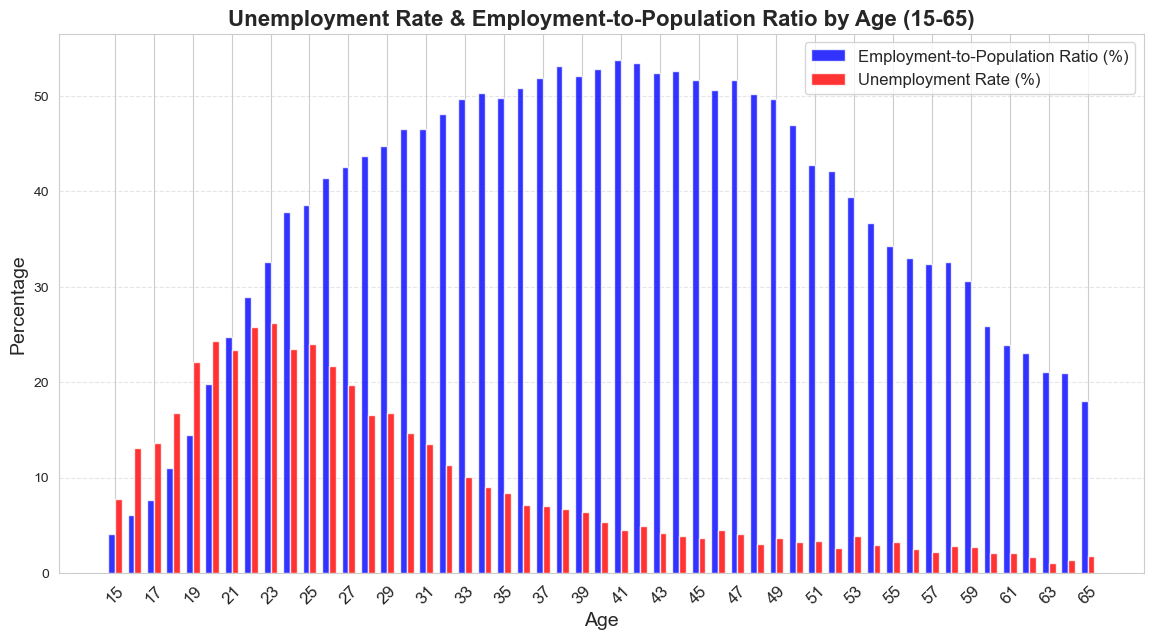

In [246]:


df['F2_D07'] = pd.to_numeric(df['F2_D07'], errors='coerce')
df = df.dropna(subset=['F2_D07'])  
df['F2_D07'] = df['F2_D07'].astype(int)  

sns.set_style("whitegrid")

age_groups = df.groupby('F2_D07')

unemployment_rate = (age_groups['ActivityStatus'].apply(lambda x: (x == 2).sum()) /
                     age_groups['ActivityStatus'].apply(lambda x: ((x == 1) | (x == 2)).sum())) * 100

employment_ratio = (age_groups['ActivityStatus'].apply(lambda x: (x == 1).sum()) /
                    age_groups.size()) * 100

common_ages = employment_ratio.index.union(unemployment_rate.index)  
employment_ratio = employment_ratio.reindex(common_ages, fill_value=0)
unemployment_rate = unemployment_rate.reindex(common_ages, fill_value=0)

employment_ratio = employment_ratio[(common_ages >= 15) & (common_ages <= 65)]
unemployment_rate = unemployment_rate[(common_ages >= 15) & (common_ages <= 65)]

ages = np.array(employment_ratio.index)

plt.figure(figsize=(14, 7))

bar_width = 0.35
plt.bar(ages - bar_width/2, employment_ratio, width=bar_width, color='blue', label='Employment-to-Population Ratio (%)', alpha=0.8)
plt.bar(ages + bar_width/2, unemployment_rate, width=bar_width, color='red', label='Unemployment Rate (%)', alpha=0.8)

plt.xticks(ages[::2], rotation=45, fontsize=12)  
plt.xlabel("Age", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.title("Unemployment Rate & Employment-to-Population Ratio by Age (15-65)", fontsize=16, fontweight='bold')

plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


# Question 3

<Figure size 1000x600 with 0 Axes>

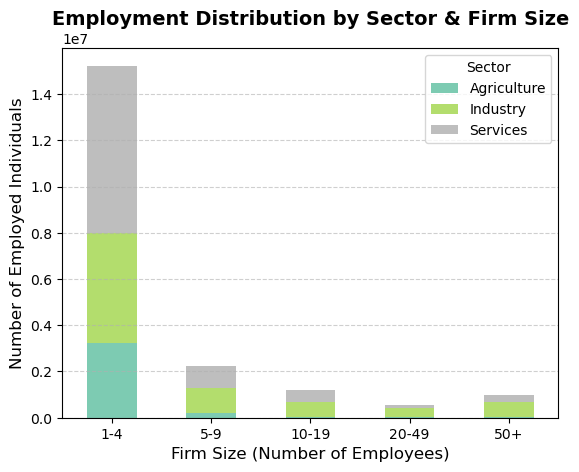

In [18]:


df['F3_D12'] = pd.to_numeric(df['F3_D12'], errors='coerce')
df['IW_Yearly'] = pd.to_numeric(df['IW_Yearly'], errors='coerce')

df['F3_D10'] = df['F3_D10'].astype(str).str.strip()  
df['ISIC_2Digits'] = pd.to_numeric(df['F3_D10'].str[:2], errors='coerce')  

def categorize_sector(code):
    if pd.isna(code):  
        return 'Unknown'
    elif 1 <= code <= 3:
        return 'Agriculture'
    elif 5 <= code <= 43:
        return 'Industry'
    elif 45 <= code <= 99:
        return 'Services'
    else:
        return 'Unknown'

df['Sector'] = df['ISIC_2Digits'].apply(categorize_sector)

df = df[df['Sector'] != 'Unknown']

employment_counts = df.groupby(['F3_D12', 'Sector'])['IW_Yearly'].sum().unstack(fill_value=0)

firm_size_labels = {
    1: "1-4",
    2: "5-9",
    3: "10-19",
    4: "20-49",
    5: "50+"
}
employment_counts.index = employment_counts.index.map(firm_size_labels)

plt.figure(figsize=(10, 6))
employment_counts.plot(kind='bar', stacked=True, colormap='Set2', alpha=0.85)

plt.xlabel("Firm Size (Number of Employees)", fontsize=12)
plt.ylabel("Number of Employed Individuals", fontsize=12)  
plt.title("Employment Distribution by Sector & Firm Size", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(title="Sector")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Question 4



Average Weekly Working Hours by Occupation & Insurance Status:
Insurance_Status          Insured  Uninsured
Occupation                                  
Clerical Support        18.000000  16.800000
Craft Workers           16.086957  16.587912
Elementary Occupations  17.200000  16.774194
Machine Operators       14.875000  15.340000
Manager                 16.000000  14.000000
Professional            15.865854  16.265306
Services & Sales        18.000000  15.798387
Skilled Agriculture     17.555556  16.094862
Technicians             17.142857  15.928571

Overall Average Weekly Working Hours:
Insurance_Status
Insured      16.196507
Uninsured    16.274979
Name: F3_D18Jam, dtype: float64

ANOVA Test p-value: 0.84169


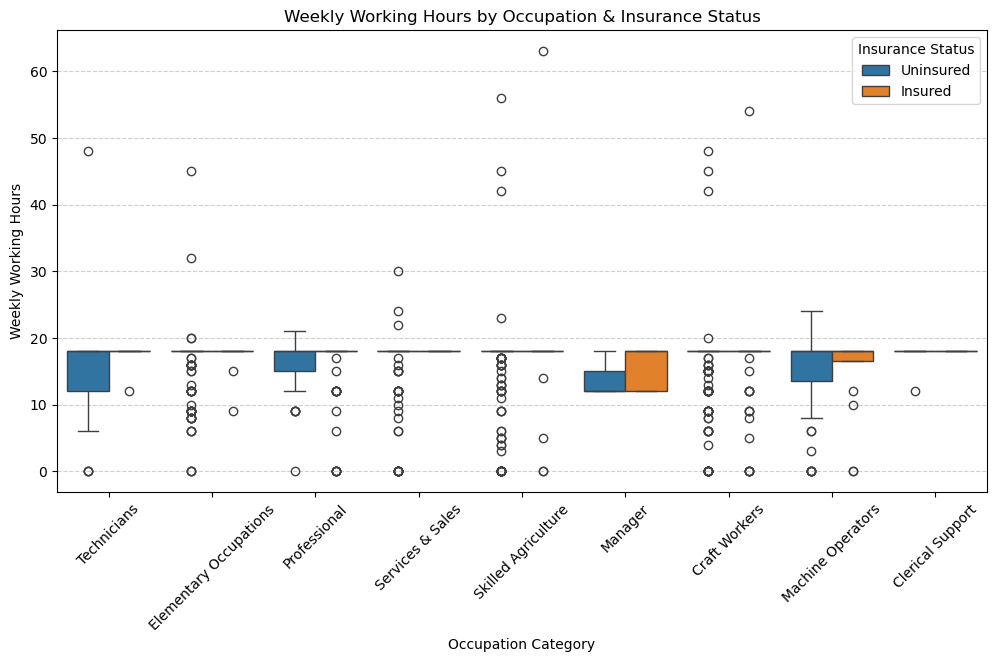

In [53]:

df['F3_D18Jam'] = pd.to_numeric(df['F3_D18JAM'], errors='coerce')  
df['F3_D13'] = pd.to_numeric(df['F3_D13'], errors='coerce')  
df['F3_D09'] = df['F3_D09'].astype(str).str.zfill(4)  

df['Occupation'] = df['F3_D09'].str[0].map({
    '1': 'Manager',
    '2': 'Professional',
    '3': 'Technicians',
    '4': 'Clerical Support',
    '5': 'Services & Sales',
    '6': 'Skilled Agriculture',
    '7': 'Craft Workers',
    '8': 'Machine Operators',
    '9': 'Elementary Occupations',
    '0': 'Armed Forces'
})

df = df.dropna(subset=['F3_D18Jam', 'F3_D13', 'Occupation'])

df['Insurance_Status'] = df['F3_D13'].map({1: 'Insured', 2: 'Uninsured'})

avg_hours_per_occupation = df.groupby(['Occupation', 'Insurance_Status'])['F3_D18Jam'].mean().unstack()

print("\nAverage Weekly Working Hours by Occupation & Insurance Status:")
print(avg_hours_per_occupation)

overall_avg_hours = df.groupby('Insurance_Status')['F3_D18Jam'].mean()

print("\nOverall Average Weekly Working Hours:")
print(overall_avg_hours)

anova_result = stats.f_oneway(
    df[df['Insurance_Status'] == 'Insured']['F3_D18Jam'],
    df[df['Insurance_Status'] == 'Uninsured']['F3_D18Jam']
)

print(f"\nANOVA Test p-value: {anova_result.pvalue:.5f}")

plt.figure(figsize=(12,6))
sns.boxplot(x='Occupation', y='F3_D18Jam', hue='Insurance_Status', data=df)
plt.xticks(rotation=45)
plt.xlabel("Occupation Category")
plt.ylabel("Weekly Working Hours")
plt.title("Weekly Working Hours by Occupation & Insurance Status")
plt.legend(title="Insurance Status")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
